# Importing needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing datasets

In [2]:

data = pd.read_csv('mcc_group_definition.csv')
data1 = pd.read_csv('2016-09-19_79351_training.csv')
data2 = pd.read_csv('transaction_types.csv')
data

,mcc_group,explanation
0,1,ATM
1,2,Groceries
2,3,Gastronomie
3,4,Shopping/(Fashion)
4,5,"Home and DIY, House Energy"
5,6,Travel/Hotel
6,7,Transport
7,8,Automotive/Gas
8,9,Family/Babies/Children
9,10,Entertainment/Leisure


In [3]:
data2

,type,explanation,direction,agent
0,AR,Authorization reject,-,Card
1,AE,Authorization expired,In,Card
2,AV,Authorization Reversal,In,Card
3,BBU,Cash26 deposit,In,Partner
4,CT,Credit Transfer,In,Bank Account
5,DI,Dispute,In,Card
6,DR,Debit Reversal,In,Bank Account
7,PF,Credit Card refund by merchant,In,Card
8,PR,Presentment Reversal,In,Card
9,WU,Referral payment,In,Number26


<AxesSubplot:>

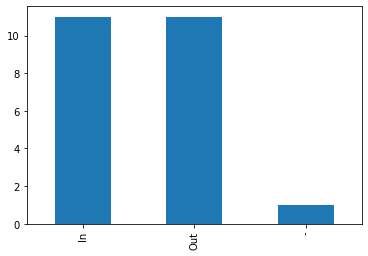

In [5]:
data2['direction'].value_counts().plot(kind = 'bar')

In [4]:
data2['direction'].value_counts()

In     11
Out    11
-       1
Name: direction, dtype: int64

In [6]:
data1.tail()

,user_id,transaction_date,transaction_type,mcc_group,amount_n26_currency,dataset_transaction,dataset_user
408541,bc639c7495889105713fc6b1025264ac,2016-07-31,DT,NaN,5,training,training
408542,0dfb685e3d705957ef9e0c472604b067,2016-07-31,DT,NaN,155,training,training
408543,918eb93c2d3b084614e3570886715f84,2016-07-31,DT,NaN,19,training,training
408544,918eb93c2d3b084614e3570886715f84,2016-07-31,DT,NaN,19,training,training
408545,25afbb78936ce100bbd1e61cecb37403,2016-07-31,DT,NaN,36,training,training


In [7]:
data1.columns


Index(['user_id', 'transaction_date', 'transaction_type', 'mcc_group',
       'amount_n26_currency', 'dataset_transaction', 'dataset_user'],
      dtype='object')

In [8]:
data2.columns = ['transaction_type', 'explanation', 'direction', 'agent']

# Merging data 

In [9]:
newdata = data1[["user_id", "transaction_date","amount_n26_currency","mcc_group",
                 "transaction_type"]].merge(data2[["transaction_type"
                         , "direction", ]],on = "transaction_type", how='inner')

In [10]:
newdata

,user_id,transaction_date,amount_n26_currency,mcc_group,transaction_type,direction
0,a78884f5e76951188c1e719d4956773a,2016-02-01,350,NaN,DT,Out
1,b0333294fef6ff1299102a70ad46b126,2016-02-01,202,NaN,DT,Out
2,7b8d2a2780adae0cd0c248e92c1b28dc,2016-02-01,291,NaN,DT,Out
3,cc4abaa500f7db4390ae3f02bd36d805,2016-02-01,214,NaN,DT,Out
4,49b99d1d5ba028566639e8b3eb7c055b,2016-02-01,272,NaN,DT,Out
...,...,...,...,...,...,...
408541,67b86e1168dfe526708ea275ac0a71a8,2016-07-29,11,NaN,TUB,Out
408542,fff08c7a5cfb93b873149159be9f7976,2016-07-29,40,NaN,TUB,Out
408543,2018aea439dab366b6ddf6f4df704342,2016-07-29,185,NaN,TUB,Out
408544,406b16e6a28b54c935763b6598bfa272,2016-07-30,71,NaN,TUB,Out


# DATA PREPROCESSING/ CLEANING

In [11]:
newdata.head(100)

,user_id,transaction_date,amount_n26_currency,mcc_group,transaction_type,direction
0,a78884f5e76951188c1e719d4956773a,2016-02-01,350,NaN,DT,Out
1,b0333294fef6ff1299102a70ad46b126,2016-02-01,202,NaN,DT,Out
2,7b8d2a2780adae0cd0c248e92c1b28dc,2016-02-01,291,NaN,DT,Out
3,cc4abaa500f7db4390ae3f02bd36d805,2016-02-01,214,NaN,DT,Out
4,49b99d1d5ba028566639e8b3eb7c055b,2016-02-01,272,NaN,DT,Out
...,...,...,...,...,...,...
95,049f700ee31bd4112333d919da9ed192,2016-02-01,49,NaN,DT,Out
96,60a06917fcdfc145734fb27b496fdd07,2016-02-01,161,NaN,DT,Out
97,bd84cc070c60f835ad14534834a33ec6,2016-02-01,4,NaN,DT,Out
98,0e55c5d598cb03d7a9ca656a0c838479,2016-02-01,35,NaN,DT,Out


In [12]:
#Checking for null values
newdata.isnull().sum()

user_id                     0
transaction_date            0
amount_n26_currency         0
mcc_group              150222
transaction_type            0
direction                   0
dtype: int64

In [13]:
# filling missing values in  mcc_group with random values from the coloumns
for col in newdata:
    mask = pd.isnull(newdata[col])
    pop = newdata[col].dropna()
    if len(pop):
        sample = np.random.choice(pop, size=len(newdata)-len(pop), replace=True)
        newdata.loc[mask, col] = sample
       

In [14]:
newdata.isnull().sum()

user_id                0
transaction_date       0
amount_n26_currency    0
mcc_group              0
transaction_type       0
direction              0
dtype: int64

In [15]:
newdata

,user_id,transaction_date,amount_n26_currency,mcc_group,transaction_type,direction
0,a78884f5e76951188c1e719d4956773a,2016-02-01,350,6.0,DT,Out
1,b0333294fef6ff1299102a70ad46b126,2016-02-01,202,7.0,DT,Out
2,7b8d2a2780adae0cd0c248e92c1b28dc,2016-02-01,291,1.0,DT,Out
3,cc4abaa500f7db4390ae3f02bd36d805,2016-02-01,214,17.0,DT,Out
4,49b99d1d5ba028566639e8b3eb7c055b,2016-02-01,272,1.0,DT,Out
...,...,...,...,...,...,...
408541,67b86e1168dfe526708ea275ac0a71a8,2016-07-29,11,1.0,TUB,Out
408542,fff08c7a5cfb93b873149159be9f7976,2016-07-29,40,1.0,TUB,Out
408543,2018aea439dab366b6ddf6f4df704342,2016-07-29,185,2.0,TUB,Out
408544,406b16e6a28b54c935763b6598bfa272,2016-07-30,71,8.0,TUB,Out


In [16]:
#Adding a column for expenses and income
newdata['income']=np.where(newdata['direction']=="In", newdata['amount_n26_currency'],0)
newdata['expenses']=np.where(newdata['direction']=="Out", newdata['amount_n26_currency'],0) 
newdata

,user_id,transaction_date,amount_n26_currency,mcc_group,transaction_type,direction,income,expenses
0,a78884f5e76951188c1e719d4956773a,2016-02-01,350,6.0,DT,Out,0,350
1,b0333294fef6ff1299102a70ad46b126,2016-02-01,202,7.0,DT,Out,0,202
2,7b8d2a2780adae0cd0c248e92c1b28dc,2016-02-01,291,1.0,DT,Out,0,291
3,cc4abaa500f7db4390ae3f02bd36d805,2016-02-01,214,17.0,DT,Out,0,214
4,49b99d1d5ba028566639e8b3eb7c055b,2016-02-01,272,1.0,DT,Out,0,272
...,...,...,...,...,...,...,...,...
408541,67b86e1168dfe526708ea275ac0a71a8,2016-07-29,11,1.0,TUB,Out,0,11
408542,fff08c7a5cfb93b873149159be9f7976,2016-07-29,40,1.0,TUB,Out,0,40
408543,2018aea439dab366b6ddf6f4df704342,2016-07-29,185,2.0,TUB,Out,0,185
408544,406b16e6a28b54c935763b6598bfa272,2016-07-30,71,8.0,TUB,Out,0,71


# Convert the 'Date' column to datetime format

In [17]:


newdata['transaction_date']= newdata['transaction_date'].astype('datetime64[ns]')
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408546 entries, 0 to 408545
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   user_id              408546 non-null  object        
 1   transaction_date     408546 non-null  datetime64[ns]
 2   amount_n26_currency  408546 non-null  int64         
 3   mcc_group            408546 non-null  float64       
 4   transaction_type     408546 non-null  object        
 5   direction            408546 non-null  object        
 6   income               408546 non-null  int64         
 7   expenses             408546 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 28.1+ MB


In [18]:
newdata['transaction_date'] = pd.to_datetime(newdata['transaction_date'], format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')
newdata['year'] = newdata['transaction_date'].dt.year
newdata['month'] = newdata['transaction_date'].dt.month
newdata['week'] = newdata['transaction_date'].dt.isocalendar().week
newdata['day'] = newdata['transaction_date'].dt.day


In [19]:
newdata

,user_id,transaction_date,amount_n26_currency,mcc_group,transaction_type,direction,income,expenses,year,month,week,day
0,a78884f5e76951188c1e719d4956773a,2016-02-01,350,6.0,DT,Out,0,350,2016,2,5,1
1,b0333294fef6ff1299102a70ad46b126,2016-02-01,202,7.0,DT,Out,0,202,2016,2,5,1
2,7b8d2a2780adae0cd0c248e92c1b28dc,2016-02-01,291,1.0,DT,Out,0,291,2016,2,5,1
3,cc4abaa500f7db4390ae3f02bd36d805,2016-02-01,214,17.0,DT,Out,0,214,2016,2,5,1
4,49b99d1d5ba028566639e8b3eb7c055b,2016-02-01,272,1.0,DT,Out,0,272,2016,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
408541,67b86e1168dfe526708ea275ac0a71a8,2016-07-29,11,1.0,TUB,Out,0,11,2016,7,30,29
408542,fff08c7a5cfb93b873149159be9f7976,2016-07-29,40,1.0,TUB,Out,0,40,2016,7,30,29
408543,2018aea439dab366b6ddf6f4df704342,2016-07-29,185,2.0,TUB,Out,0,185,2016,7,30,29
408544,406b16e6a28b54c935763b6598bfa272,2016-07-30,71,8.0,TUB,Out,0,71,2016,7,30,30


# Creating a new dataframe for income and expenses separately

In [20]:
income_data = pd.DataFrame(newdata, columns =['year','month','week','day','transaction_type','mcc_group','income'])
index_names = income_data[ income_data['income'] == 0].index
income_data.drop(index_names, inplace = True)
income_data

,year,month,week,day,transaction_type,mcc_group,income
40528,2016,2,5,1,CT,10.0,24
40529,2016,2,5,1,CT,1.0,38
40530,2016,2,5,1,CT,1.0,34
40531,2016,2,5,1,CT,1.0,5
40532,2016,2,5,1,CT,6.0,7
...,...,...,...,...,...,...,...
407369,2016,7,30,30,BBU,4.0,57
407370,2016,7,30,30,BBU,16.0,57
407371,2016,7,30,30,BBU,8.0,19
407372,2016,7,30,30,BBU,8.0,115


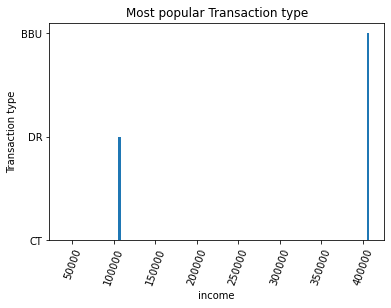

In [21]:
plt.bar(income_data.index,income_data['transaction_type'])

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('income') 

#y-axis labels 
plt.ylabel('Transaction type') 

#plot title 
plt.title('Most popular Transaction type') 



#display 
plt.show();

In [22]:
expenses_data = pd.DataFrame(newdata, columns =['year','month','week','day','transaction_type','mcc_group','expenses',])
expenses_names = expenses_data[ expenses_data['expenses'] == 0].index
expenses_data.drop(expenses_names, inplace = True)
expenses_data

,year,month,week,day,transaction_type,mcc_group,expenses
0,2016,2,5,1,DT,6.0,350
1,2016,2,5,1,DT,7.0,202
2,2016,2,5,1,DT,1.0,291
3,2016,2,5,1,DT,17.0,214
4,2016,2,5,1,DT,1.0,272
...,...,...,...,...,...,...,...
408541,2016,7,30,29,TUB,1.0,11
408542,2016,7,30,29,TUB,1.0,40
408543,2016,7,30,29,TUB,2.0,185
408544,2016,7,30,30,TUB,8.0,71


# Label Encoding of transaction_type

In [ ]:
expenses_data['transaction_type'].unique()

In [ ]:

from  sklearn.preprocessing import LabelEncoder 

label_encoder= LabelEncoder()
expenses_data['transaction_type']= label_encoder.fit_transform(expenses_data['transaction_type'])
expenses_data['transaction_type'].unique()

income_data['transaction_type']= label_encoder.fit_transform(income_data['transaction_type'])
income_data['transaction_type'].unique()




In [ ]:
expenses_data

# Randomly Selecting Rows from the data

In [ ]:
rand_data_income=income_data.sample(n=10000,random_state = 0)
rand_data_income

In [ ]:
rand_data_income.shape

# Normalization of the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler=scaler.fit(rand_data_income)
rand_data_income=pd.DataFrame(scaler.transform(rand_data_income), columns=rand_data_income.columns)
rand_data_income

# Building a model to predict income

In [ ]:
x=rand_data_income.drop(columns=['income','transaction_type','mcc_group']).values
y=rand_data_income['income'].values


# Training a model to predict base on record from feb-july for income

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)
y_pred

# Transforming back the scale data After Prediction

 I wasn't able to find the right code to do this part

In [ ]:
x_train.shape

In [ ]:

#rescale=scaler.inverse_transform(y_pred.reshape(1, -1))

# Model Evaluation for Income

In [ ]:
#mean_absolute_error 
from sklearn.metrics import mean_absolute_error 
mae= mean_absolute_error(y_test,y_pred)
mae
 

In [ ]:
#Root Mean Square Error (RMSE)from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
gmae= np.sqrt(mean_squared_error(y_test,y_pred))
gmae

# Predicting for Expenses

In [ ]:
rand_data_exp=expenses_data.sample(n=10000,random_state = 0)
rand_data_exp

In [ ]:

rand_data_exp=pd.DataFrame(scaler.fit_transform(rand_data_exp), columns=rand_data_exp.columns)
rand_data_exp

In [ ]:
x1=rand_data_exp.drop(columns=['expenses','transaction_type','mcc_group']).values
y2=rand_data_exp['expenses'].values


# Model Evaluation for Expenses

In [ ]:
#splitling the data for test and train
x1_train, x1_test, y2_train, y2_test = train_test_split(x1, y2,test_size=0.2, random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(x1_train,y2_train)

In [ ]:
#predicting with text value
exp_pred = model2.predict(x1_test)
exp_pred

# Model Evaluation for Expenses

In [ ]:
#mean_absolute_error 
from sklearn.metrics import mean_absolute_error 
mae1= mean_absolute_error(y2_test,exp_pred)
mae1

In [ ]:
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse1= np.sqrt(mean_squared_error(y2_test,exp_pred))
rmse1

# Getting data to predict income based on transaction type 

In [ ]:
tran=rand_data_income['transaction_type'].values.reshape(-1, 1)
incomee=rand_data_income['income'].values.reshape(-1, 1)
incomee.shape

In [ ]:
#splitling the data for test and train 

tt_train, tt_test, cc_train, cc_test = train_test_split(tran, incomee,test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
model3=LinearRegression()
model3.fit(tt_train,cc_train)

In [ ]:
#predicting with text value
trantype_pred= model3.predict(tt_test)
trantype_pred

In [ ]:
#mean_absolute_error 
from sklearn.metrics import mean_absolute_error 
mae2= mean_absolute_error(cc_test,trantype_pred)
mae2

In [ ]:
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(cc_test,trantype_pred))
print('RMSE (Root-MSE):',rmse)

In [ ]:
trantype_pred.shape

# Getting data to predict expenses based on transaction type

In [ ]:
tran_exp=rand_data_exp['transaction_type'].values.reshape(-1, 1)
exppp=rand_data_exp['expenses'].values.reshape(-1, 1)
tran_exp

In [ ]:
#splitling the data for test and train 

x3_train, x3_test, y4_train, y4_test = train_test_split(tran_exp, exppp,test_size=0.2, random_state=0)
model4=LinearRegression()
model4.fit(x3_train,y4_train)

In [ ]:
#predicting with text value
trantype_exp_pred= model4.predict(y4_test)
trantype_exp_pred

# Function for August

##### I tried creating a function which accepts the august transactions but I had difficulty in finding the right code.

In [ ]:
def august(augdata):
    import datetime
    data1=augdata
    
    
    
    
    #data1=data1['transaction_date'].astype('datetime64[ns]')
    #date=pd.to_datetime(date, format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')
    #date['year'] = date.dt.year
    #date['week'] = date.dt.isocalendar().week
    #date['day'] = date.dt.day 
    #scaler = MinMaxScaler()
    #date=pd.DataFrame(scaler.fit_transform(date), columns=date.columns)
   
    #x1=data1['transaction_date']
    #x1=np.array(x1).reshape(1,-1)
    #x1=scaler.fit_transform(x1)
    #new_income_predict=model.predict(x1)
    #new_exp_predict=model2.predict(x1)

    return newdata #print("predicted income and expenses is: ",new_income_predict,new_exp_predict," respectively")

In [ ]:
august(pd.read_csv('2016-09-19_79351_training.csv'))

In [ ]:
#function to accept date and transaction type and predict income and expenses
def August(year,month,week,day, trasaction_type):
    x1=[year,month,week,day,trasaction_type]
    #label ecoding transaction type
    x1=label_encoder.fit_transform(x1[:4])
    x1=np.array(x1).reshape(1,-1)
    x1=scaler.fit_transform(x1)
    x2=x1[0,3]
    x2=x2.reshape(1,-1)
    new_income_predict=model.predict(x1)
    new_exp_predict=model2.predict(x1)
    newttinc=model3.predict(x2)
    newttexp=model4.predict(x2)
    
    return print("predicted income and expenses is: ",new_income_predict,new_exp_predict," respectively",
                 
                "/  predicted income and expenses base on transaction type is: ", newttinc,newttexp ," respectively")


In [ ]:
August(2016,8,2,3,'dt')